<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.606276,31.363493,74.385079,-0.229986,159.124863,159.368150,-0.243287
1,0.0,1.0,76.521318,77.815231,32.726030,-0.193445,196.869134,196.919349,-0.050215
2,0.0,2.0,69.835416,95.973882,38.317338,-0.293712,213.832924,213.946784,-0.113861
3,0.0,3.0,39.836102,60.479470,81.302208,0.062265,191.680045,191.561477,0.118568
4,0.0,4.0,35.850005,65.687050,81.725014,0.137748,193.399817,193.199177,0.200640
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.418632,46.695465,88.526546,0.644391,242.285035,241.730768,0.554267
59996,999.0,56.0,21.704879,35.056771,47.654100,-0.574247,113.841504,114.273266,-0.431762
59997,999.0,57.0,68.043161,78.660058,28.137032,-1.199318,183.640932,184.760976,-1.120044
59998,999.0,58.0,58.600289,70.232517,48.043372,-0.123915,186.752263,186.779690,-0.027427


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.606276,31.363493,74.385079,-0.229986,159.124863,159.368150,-0.243287
1,0.0,1.0,76.521318,77.815231,32.726030,-0.193445,196.869134,196.919349,-0.050215
2,0.0,2.0,69.835416,95.973882,38.317338,-0.293712,213.832924,213.946784,-0.113861
3,0.0,3.0,39.836102,60.479470,81.302208,0.062265,191.680045,191.561477,0.118568
4,0.0,4.0,35.850005,65.687050,81.725014,0.137748,193.399817,193.199177,0.200640
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.418632,46.695465,88.526546,0.644391,242.285035,241.730768,0.554267
59996,999.0,56.0,21.704879,35.056771,47.654100,-0.574247,113.841504,114.273266,-0.431762
59997,999.0,57.0,68.043161,78.660058,28.137032,-1.199318,183.640932,184.760976,-1.120044
59998,999.0,58.0,58.600289,70.232517,48.043372,-0.123915,186.752263,186.779690,-0.027427


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.606276  31.363493  74.385079  ...  159.124863  159.368150 -0.243287
      1.0    76.521318  77.815231  32.726030  ...  196.869134  196.919349 -0.050215
      2.0    69.835416  95.973882  38.317338  ...  213.832924  213.946784 -0.113861
      3.0    39.836102  60.479470  81.302208  ...  191.680045  191.561477  0.118568
      4.0    35.850005  65.687050  81.725014  ...  193.399817  193.199177  0.200640
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   96.418632  46.695465  88.526546  ...  242.285035  241.730768  0.554267
      56.0   21.704879  35.056771  47.654100  ...  113.841504  114.273266 -0.431762
      57.0   68.043161  78.660058  28.137032  ...  183.640932  184.760976 -1.120044
      58.0   58.600289  70.232517  48.043372  ...  186.752263  186.779690 -0.027427
      59.0   86.295484  99.431508  36.707417  ...  232.423721  232.367866  0.055855

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.606276  31.363493  74.385079  ...  159.124863  159.368150 -0.243287
      1.0    76.521318  77.815231  32.726030  ...  196.869134  196.919349 -0.050215
      2.0    69.835416  95.973882  38.317338  ...  213.832924  213.946784 -0.113861
      3.0    39.836102  60.479470  81.302208  ...  191.680045  191.561477  0.118568
      4.0    35.850005  65.687050  81.725014  ...  193.399817  193.199177  0.200640
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   96.418632  46.695465  88.526546  ...  242.285035  241.730768  0.554267
      56.0   21.704879  35.056771  47.654100  ...  113.841504  114.273266 -0.431762
      57.0   68.043161  78.660058  28.137032  ...  183.640932  184.760976 -1.120044
      58.0   58.600289  70.232517  48.043372  ...  186.752263  186.779690 -0.027427
      59.0   86.295484  99.431508  36.707417  ...  232.423721  232.367866  0.055855

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.606276,31.363493,74.385079,-0.229986,159.124863,159.368150,-0.243287
1,0.0,1.0,76.521318,77.815231,32.726030,-0.193445,196.869134,196.919349,-0.050215
2,0.0,2.0,69.835416,95.973882,38.317338,-0.293712,213.832924,213.946784,-0.113861
3,0.0,3.0,39.836102,60.479470,81.302208,0.062265,191.680045,191.561477,0.118568
4,0.0,4.0,35.850005,65.687050,81.725014,0.137748,193.399817,193.199177,0.200640
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.418632,46.695465,88.526546,0.644391,242.285035,241.730768,0.554267
59996,999.0,56.0,21.704879,35.056771,47.654100,-0.574247,113.841504,114.273266,-0.431762
59997,999.0,57.0,68.043161,78.660058,28.137032,-1.199318,183.640932,184.760976,-1.120044
59998,999.0,58.0,58.600289,70.232517,48.043372,-0.123915,186.752263,186.779690,-0.027427


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.606276  31.363493  74.385079  ...  159.124863  159.368150 -0.243287
      1.0    76.521318  77.815231  32.726030  ...  196.869134  196.919349 -0.050215
      2.0    69.835416  95.973882  38.317338  ...  213.832924  213.946784 -0.113861
      3.0    39.836102  60.479470  81.302208  ...  191.680045  191.561477  0.118568
      4.0    35.850005  65.687050  81.725014  ...  193.399817  193.199177  0.200640
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   96.418632  46.695465  88.526546  ...  242.285035  241.730768  0.554267
      56.0   21.704879  35.056771  47.654100  ...  113.841504  114.273266 -0.431762
      57.0   68.043161  78.660058  28.137032  ...  183.640932  184.760976 -1.120044
      58.0   58.600289  70.232517  48.043372  ...  186.752263  186.779690 -0.027427
      59.0   86.295484  99.431508  36.707417  ...  232.423721  232.367866  0.055855

[60000 rows x 7 columns]

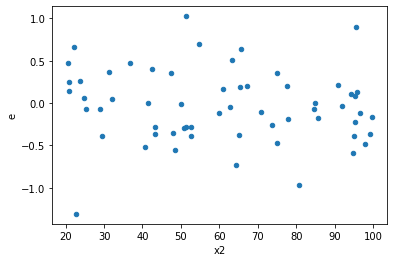

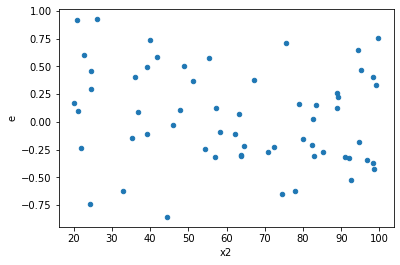

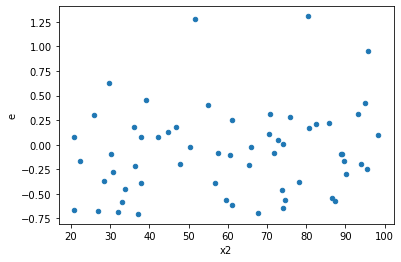

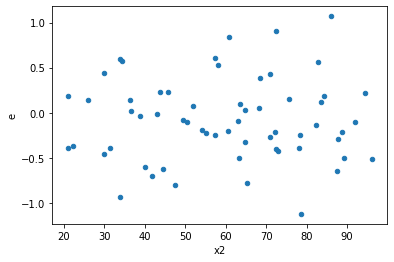

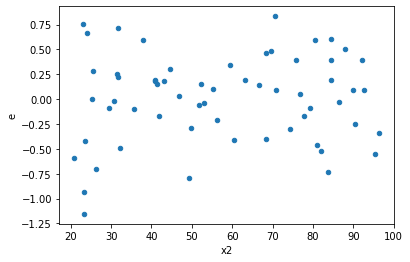

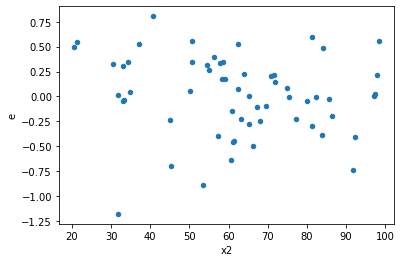

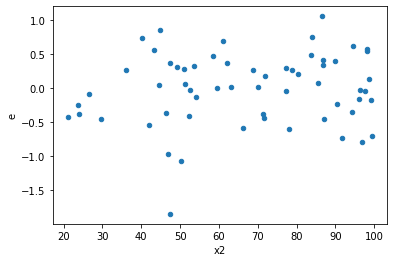

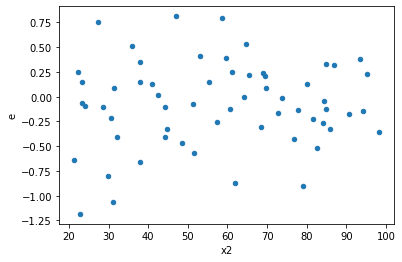

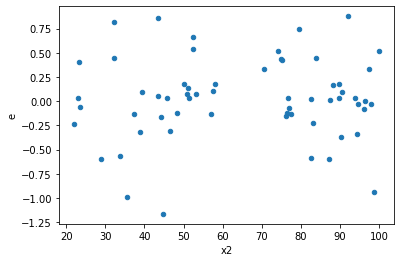

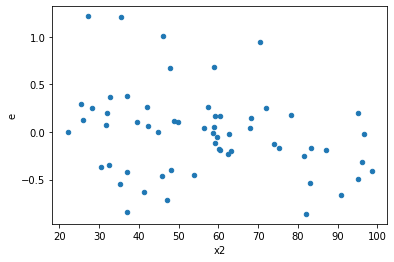

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,21.0,21.0,2.10554050987696,4.009339895435995,0.10026383380366477,0.19092094740171406,1.9041855887495063,0.14815190976331882,0.9259240451183406,0.07407595488165941,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,3.5191916597953234,5.192326030411018,0.16758055522834875,0.24725362049576277,1.475431443456252,0.37997840554820383,0.8100107972258981,0.18998920277410192,Reject005=1 : Homoscedasticity
12.0,21.0,21.0,3.7686875034230587,4.775894886356272,0.17946130968681231,0.22742356601696534,1.2672568054577031,0.5921902603001825,0.7039048698499087,0.29609513015009126,Reject005=1 : Homoscedasticity
13.0,21.0,21.0,4.012979017093039,4.807255678567592,0.1910942389091923,0.22891693707464725,1.1979269410807734,0.6828182065822401,0.6585908967088799,0.34140910329112006,Reject005=1 : Homoscedasticity
28.0,21.0,21.0,3.1093561916121337,3.4185174313458644,0.14806458055295874,0.16278654434980305,1.0994293418578838,0.8300908466220744,0.5849545766889628,0.4150454233110372,Reject005=1 : Homoscedasticity
30.0,21.0,21.0,3.6596658559898194,4.058136835278271,0.1742698026661819,0.19324461120372718,1.1088817927560979,0.8150186435180446,0.5924906782409777,0.4075093217590223,Reject005=1 : Homoscedasticity
33.0,21.0,21.0,2.066487293395233,4.381771154550454,0.09840415682834443,0.20865576926430732,2.1203958855954133,0.09245523951647172,0.9537723802417641,0.04622761975823586,Reject005=1 : Homoscedasticity
36.0,21.0,21.0,5.259535945130988,5.494821737402895,0.2504540926252852,0.26165817797156643,1.0447350858947397,0.9210713384058935,0.5394643307970532,0.46053566920294675,Reject005=1 : Homoscedasticity
41.0,21.0,21.0,3.405816199681795,4.341880061521539,0.16218172379437118,0.20675619340578755,1.2748427416391994,0.5829160579892045,0.7085419710053977,0.29145802899460227,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,4.474331790562532,2.959575749159604,0.21306341859821581,0.1409321785314097,0.6614564783510419,0.3510507828751499,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,2.10554050987696,4.009339895435995,0.10026383380366477,0.19092094740171406,1.9041855887495063,0.14815190976331882,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,5.088195439403499,3.2236124959336783,0.24229502092397615,0.15350535694922277,0.6335473026389076,0.3034607619007869,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,4.499519870768452,3.114168645350849,0.2142628509889739,0.14829374501670708,0.6921113218284319,0.40601119293913035,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,6.204891659027943,2.147328797897664,0.29547103138228303,0.10225375228084113,0.34607031289150075,0.018765813653105562,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,4.02623863883758,2.9993303407017438,0.19172564946845622,0.14282525431913065,0.7449459929597425,0.5057369914681814,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,3.5191916597953234,5.192326030411018,0.16758055522834875,0.24725362049576277,1.475431443456252,0.37997840554820383,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,6.380247875146644,3.3133382160755964,0.30382132738793544,0.15777801028931412,0.519311832535886,0.1413437954155588,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,5.657868318265914,2.8969113608344816,0.2694223008698054,0.13794816003973723,0.5120146312847308,0.1330937988753063,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      864
Reject005=0 : Heteroscedasticity    136
Name: Result_test, dtype: int64